### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Reading data

In [3]:
data = pd.read_csv("Group1.xlsx - Group1.csv")
data.head()

,S1,S2,S3
0,450,366,382
1,435,372,389
2,441,368,378
3,448,371,381
4,442,371,372


## Q1. Compute the central tendency measures
Mean. Median and Mode are the central tendency measure. 

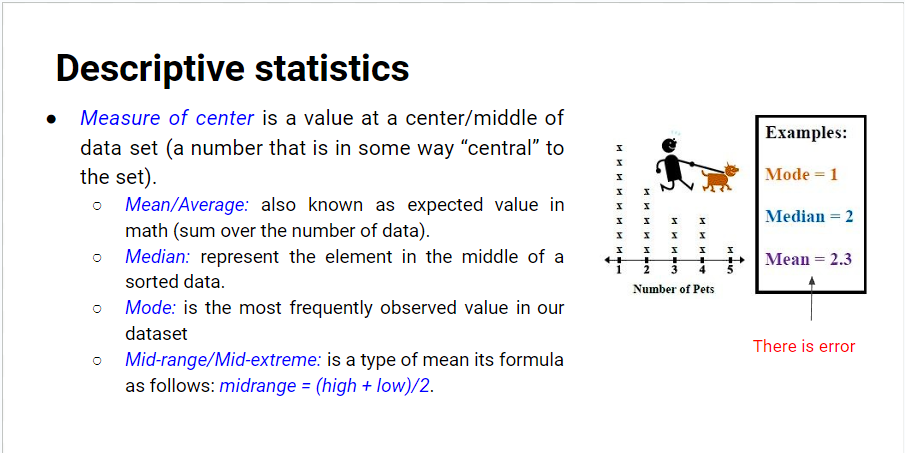

In [20]:
means = []

for i in range (0,3):
    mean = data.iloc[:,i].mean()
#     print(mean)
    means.append(mean)
means

[428.65185185185186, 304.837037037037, 296.68148148148146]

In [21]:
modes = []

for i in range (0,3):
    mode = data.iloc[:,i].mode()
    modes.append(mode)
modes

[0    425
 1    427
 2    442
 Name: S1, dtype: int64,
 0    370
 Name: S2, dtype: int64,
 0    246
 1    255
 Name: S3, dtype: int64]

In [25]:
medians = []

for i in range (0,3):
    median = data.iloc[:,i].median()
    medians.append(median)
medians

[430.0, 320.0, 298.0]

In [27]:
mid_extremes = []

for i in range (0,3):
    max = data.iloc[:,i].max()
    min = data.iloc[:,i].min()
    mid_extreme = (min+max)/2
    mid_extremes.append(mid_extreme)
mid_extremes

[419.0, 264.5, 275.5]

## Q2. Compute the spread measures
Range, Interquartile Range, and Standard Deviation

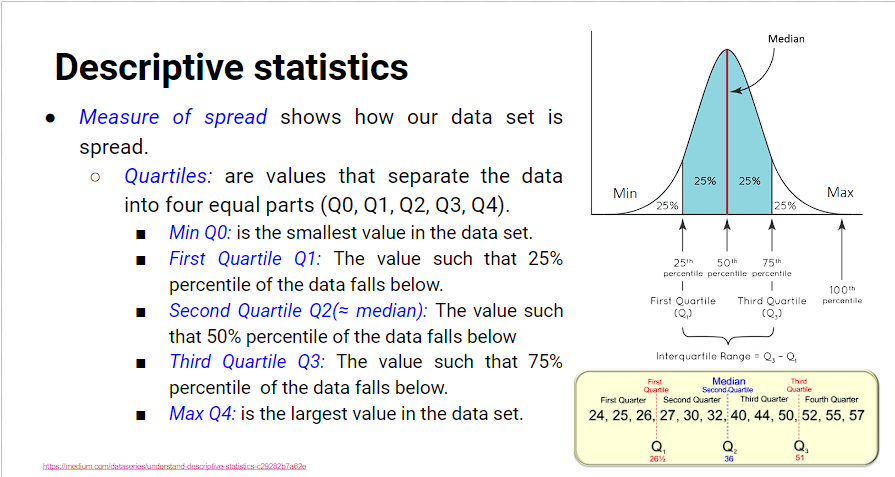

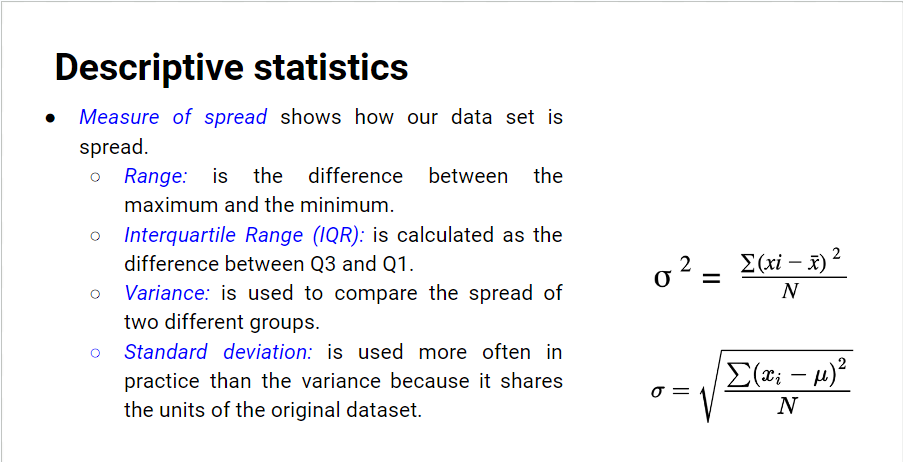

#### Quartiles

In [31]:
data.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)


,S1,S2,S3
0.25,421.0,254.5,246.5
0.50,430.0,320.0,298.0
0.75,441.0,362.0,354.0


#### IQR

In [35]:
IQRs = []

for i in range (0,3):
    Q1 = np.quantile(data.iloc[:,i], 0.25)
    Q3 = np.quantile(data.iloc[:,i], 0.75)
    IQR = Q3 - Q1
    IQRs.append(IQR)
IQRs

[20.0, 107.5, 107.5]

#### Ranges

In [36]:
ranges = []

for i in range (0,3):
    max_ = data.iloc[:,i].max()
    min_ = data.iloc[:,i].min()
    range_ = max_-min_
    ranges.append(range_)
ranges

[146, 215, 227]

#### Variance

In [37]:
variances = []

for i in range (0,3):
    variance = data.iloc[:,i].var()
    variances.append(variance)
variances

[403.33311221669436, 3528.406080707573, 3778.2186843559975]

In [38]:
STDs = []

for i in range (0,3):
    STD = data.iloc[:,i].std()
    STDs.append(STD)
STDs

[20.08315493682938, 59.400387883477435, 61.46721633810984]

### Conclusion

S1 is different from the other 2 columns since all the spread measures and central tendency measures of S2 and S3 are almost similar

## Q3. Is it possible to divide a categorical dataset using quartiles?

Quartiles are generally calculated for continuous variables. However, we can convert categorical variables to numericals using get_dummies method in pandas and then find out the quartiles.

* Suppose we have list of set of colors
* Colors = [Red, Green, Blue, Blue, Green, Red, Yellow, Orange, Purple, Blue, Green, Red, Blue, Yellow, Orange, Green, Blue, Red, Yellow, Green]
* How can we make Quartiles in such a case?



In [43]:
Colors = ['Red', 'Green', 'Blue', 'Blue', 'Green', 'Red', 'Yellow', 'Orange', 'Purple', 'Blue', 'Green', 'Red', 'Blue', 'Yellow', 'Orange', 'Green', 'Blue', 'Red', 'Yellow', 'Green']

# Converting list to dataframe
df = pd.DataFrame({'color': Colors})

# Creating dummies
dummies = pd.get_dummies(df['color'])
df = pd.concat([df, dummies], axis=1)
df

,color,Blue,Green,Orange,Purple,Red,Yellow
0,Red,0,0,0,0,1,0
1,Green,0,1,0,0,0,0
2,Blue,1,0,0,0,0,0
3,Blue,1,0,0,0,0,0
4,Green,0,1,0,0,0,0
5,Red,0,0,0,0,1,0
6,Yellow,0,0,0,0,0,1
7,Orange,0,0,1,0,0,0
8,Purple,0,0,0,1,0,0
9,Blue,1,0,0,0,0,0


In [44]:
# There are 6 different colors and 19 values

# calculate the frequencies of each column
freqs = df.iloc[:,1:].sum()
freqs

Blue      5
Green     5
Orange    2
Purple    1
Red       4
Yellow    3
dtype: int64

In [45]:
quartiles = pd.qcut(freqs, q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartiles

Blue      Q4
Green     Q4
Orange    Q1
Purple    Q1
Red       Q3
Yellow    Q2
dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [46]:
quartile_map = dict(zip(freqs.index, quartiles))
df['quartile'] = df['color'].map(quartile_map)
df

,color,Blue,Green,Orange,Purple,Red,Yellow,quartile
0,Red,0,0,0,0,1,0,Q3
1,Green,0,1,0,0,0,0,Q4
2,Blue,1,0,0,0,0,0,Q4
3,Blue,1,0,0,0,0,0,Q4
4,Green,0,1,0,0,0,0,Q4
5,Red,0,0,0,0,1,0,Q3
6,Yellow,0,0,0,0,0,1,Q2
7,Orange,0,0,1,0,0,0,Q1
8,Purple,0,0,0,1,0,0,Q1
9,Blue,1,0,0,0,0,0,Q4
